# Lista 4

### Otavio Santos 81883

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as st
%matplotlib inline

### Exercício 1

In [2]:
# Importando os dados
data = np.loadtxt('woods_hole_tides_2005_05.dat')

In [3]:
# Dimensões dos dados
data.shape

(7440, 8)

In [4]:
# Transformando em DataFrame
col = ['station ID', 'year', 'month', 'day', 'hour', 'minute', 'predMLLW', 'verMLLW']
df = pd.DataFrame(data, columns = col)
df.head()

,station ID,year,month,day,hour,minute,predMLLW,verMLLW
0,8447930.0,2005.0,5.0,1.0,0.0,0.0,0.316,0.572
1,8447930.0,2005.0,5.0,1.0,0.0,6.0,0.334,0.558
2,8447930.0,2005.0,5.0,1.0,0.0,12.0,0.353,0.570
3,8447930.0,2005.0,5.0,1.0,0.0,18.0,0.372,0.580
4,8447930.0,2005.0,5.0,1.0,0.0,24.0,0.391,0.622


In [5]:
# Ajustando a data
date = pd.DataFrame(df[col[1:6]])
date = pd.to_datetime(date, format='%Y-%m-%D %H:%M')

In [6]:
# Dataframe com a data ajustada
copy = df.copy() # cópia do dataframe original
df['Date'] = date
del (df['year'], df['month'], df['day'], df['hour'], df['minute'])
df.head()

,station ID,predMLLW,verMLLW,Date
0,8447930.0,0.316,0.572,2005-05-01 00:00:00
1,8447930.0,0.334,0.558,2005-05-01 00:06:00
2,8447930.0,0.353,0.570,2005-05-01 00:12:00
3,8447930.0,0.372,0.580,2005-05-01 00:18:00
4,8447930.0,0.391,0.622,2005-05-01 00:24:00


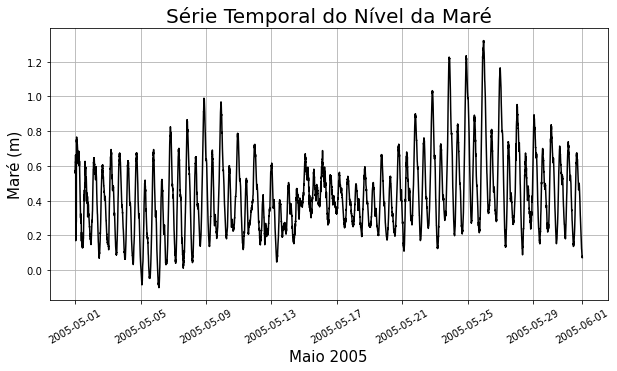

In [7]:
# Série Temporal do nível da maré
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['verMLLW'], color='black')
plt.xticks(rotation = 30)
plt.title('Série Temporal do Nível da Maré', fontdict={'size':20})
plt.xlabel('Maio 2005', fontdict={'size':15})
plt.ylabel('Maré (m)', fontdict={'size':15})
plt.grid(True)
plt.show()

In [8]:
# Autocovariância
n = len(df['verMLLW'])
a_cov = st.acovf(df['verMLLW'], unbiased=True)
a_cov = np.delete(a_cov, n-1) # exclui o último elemento

C:\Users\otavio\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:372: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


In [9]:
# Lag
x = np.arange(0, n-1)/10  

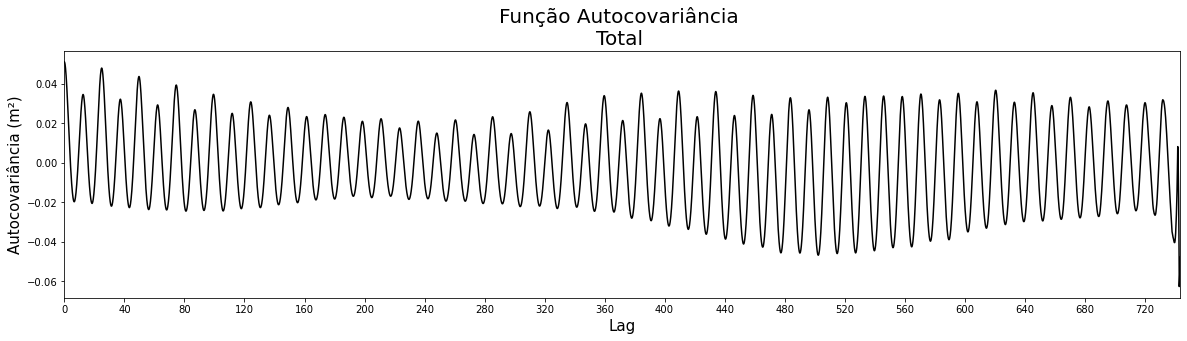

In [10]:
# Plot lag total
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x, a_cov, color='black')
plt.xlim(x[0], x[n-2]) # menos 2 pois existe o indice 0
plt.xticks(x[::400])
plt.title('Função Autocovariância \nTotal ', fontdict={'size':20})
plt.ylabel('Autocovariância (m²)', fontdict={'size':15})
plt.xlabel('Lag', fontdict={'size':15})
plt.show()

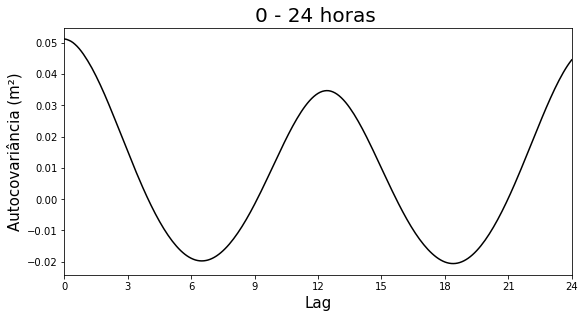

In [11]:
# Plot lag 24 horas
plt.figure(figsize=(20,10))
plt.subplot(223)
plt.plot(x[:241], a_cov[:241], color='black')
plt.xlim(x[0], x[240]) 
plt.xticks(x[:241:30])
plt.title('0 - 24 horas ', fontdict={'size':20})
plt.ylabel('Autocovariância (m²)', fontdict={'size':15})
plt.xlabel('Lag', fontdict={'size':15})
plt.show()

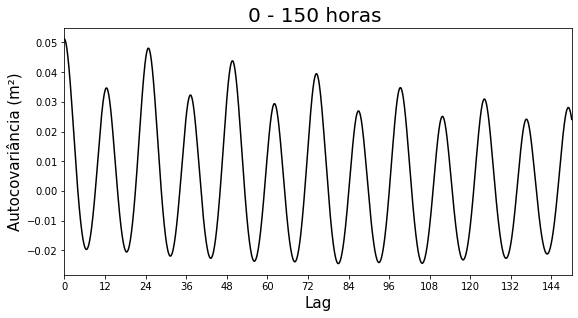

In [12]:
# Plot lag 150 horas
plt.figure(figsize=(20,10))
plt.subplot(224)
plt.plot(x[:1501], a_cov[:1501], color='black')
plt.xlim(x[0], x[1500]) 
plt.xticks(x[:1501:120])
plt.title('0 - 150 horas ', fontdict={'size':20})
plt.ylabel('Autocovariância (m²)', fontdict={'size':15})
plt.xlabel('Lag', fontdict={'size':15})
plt.show()

Considerando que a autocovariância é a depêndencia de dois elementos de uma mesma série em instantes distintos, quando o dado encontra-se no lag 0, isso significa que o dado esta sendo comparado com ele próprio, ou seja, o seu valor será máximo no instante 0. Conforme passam as horas, a interferência nos sinais posteriores fica cada vez menor devido ao afastamento gradual da medição atual.

### Exercício 2

In [13]:
# Tempo de decorrelação
i_time_dec = 0  # índice de tempo de decorrelação
for valor in range(0, n):
    if(a_cov[valor] <= 0):
        i_time_dec = valor
        break

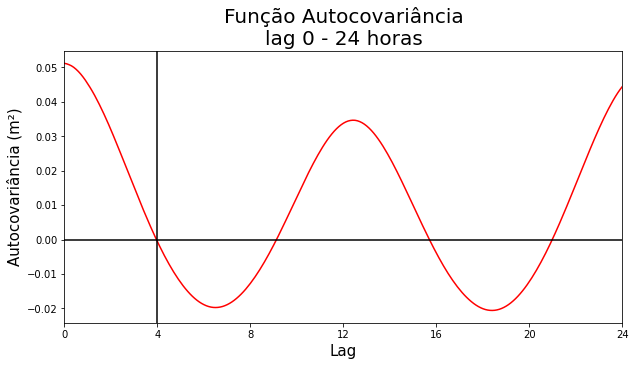

In [14]:
# Plot autocovariância e tempo de decorrelação
plt.figure(figsize=(10,5))
plt.plot(x[:241], a_cov[:241], color='red')
plt.xlim(x[0], x[240])
plt.xticks(x[:241:40])
plt.ylabel('Autocovariância (m²)', fontdict={'size':15})
plt.axhline(0, color='black')
plt.axvline(4, color='black')
plt.title('Função Autocovariância\nlag 0 - 24 horas', fontdict={'size':20})
plt.xlabel('Lag', fontdict={'size':15})
plt.show()

O tempo de decorrelação, momento em que a autocovariância ultrapassa pela primeira vez o valor zero, esta estimado em quatro horas.

Embora não seja estatisticamente confiável, os valores de autocovariância permanecem consideralvemente altos após o tempo de decorrelação devido oscilarem juntamente com o sinal da maré.

### Exercício 3

In [15]:
# Dados aleatórios
rand_data = np.random.randn(7440) # dados randômicos 
a_cov_rand = st.acovf(rand_data, unbiased=True)
a_cov_rand = np.delete(a_cov_rand, n-1)

C:\Users\otavio\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:372: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


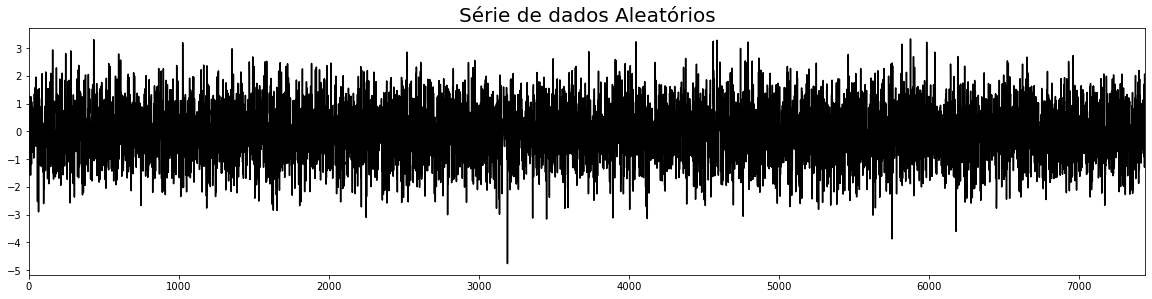

In [16]:
# Plot da série
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(rand_data, color='black')
plt.xlim(0, len(rand_data))
plt.title('Série de dados Aleatórios', fontdict={'size':20})
plt.show()

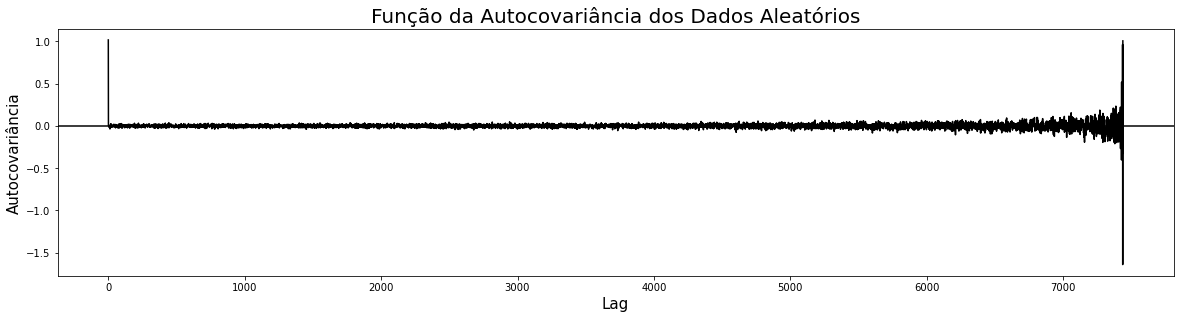

In [17]:
# Plot autocovariância
plt.figure(figsize=(20,10))
plt.subplot(212)
plt.plot(a_cov_rand, color='black')
plt.title('Função da Autocovariância dos Dados Aleatórios', fontdict={'size':20})
plt.axhline(0, color='black')
plt.ylabel('Autocovariância', fontdict={'size':15})
plt.xlabel('Lag', fontdict={'size':15})
plt.show()

Nos dados randômicos a autocovariância cai para zero imediatamente após a primeira medição, pois não é possível prever as próximas medições, uma vez que os valores são aleatórios e não possuem relação entre si. Diferentemente do que ocorre nos valores reais de maré, aonde se observa uma relação entre as medições e, desta forma, observa-se também uma autocovariância bem determinada.

### Exercício 4

In [18]:
# Autocorrelação
a_cor = a_cov/(np.std(df['verMLLW'])**2)
a_cor_rand = a_cov_rand/(np.std(rand_data)**2)

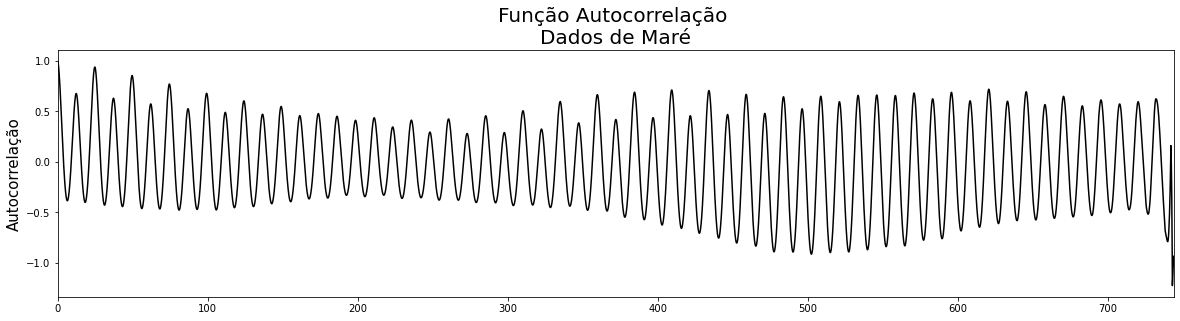

In [19]:
# Plot autocorrelação dados de maré
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x, a_cor, color='black')
plt.xlim(x[0],x[n-2])
plt.title('Função Autocorrelação \nDados de Maré', fontdict={'size':20})
plt.ylabel('Autocorrelação', fontdict={'size':15})
plt.show()

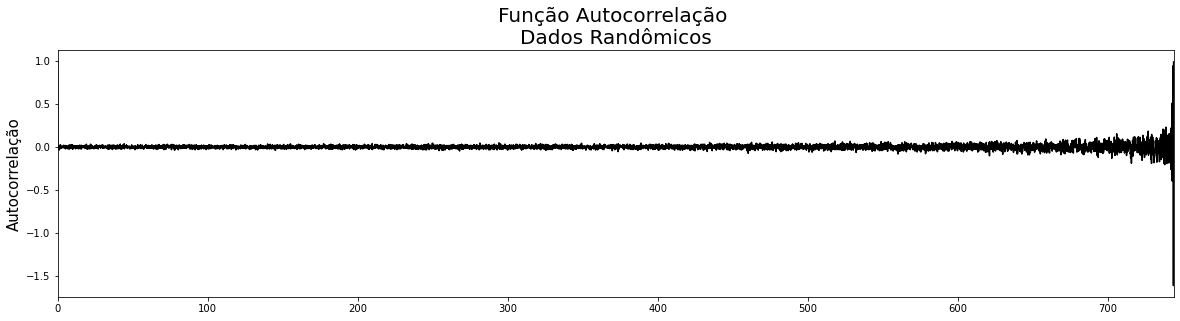

In [20]:
# Plot autocorrelação dados randômicos
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(x, a_cor_rand, color='black')
plt.xlim(x[0],x[n-2])
plt.title('Função Autocorrelação \nDados Randômicos', fontdict={'size':20})
plt.ylabel('Autocorrelação', fontdict={'size':15})
plt.show()